# **Machine Learning in Python: Performing Principal Component Analysis (PCA)**

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will be performing Principal Component Analysis (PCA) using the Iris data set as an example.

---

## **1. Iris data set**

### Load library

In [ ]:
from sklearn import datasets

### Load dataset

In [ ]:
iris = datasets.load_iris()

### Input features

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Output features

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Assigning Input (X) and Output (Y) variables
Let's assign the 4 input variables to X and the output variable (class label) to Y

In [ ]:
X = iris.data
Y = iris.target

### Let's examine the data dimension

In [ ]:
X.shape

(150, 4)

In [ ]:
Y.shape

(150,)

---

## **2. PCA analysis**

### 2.1. Load library

In [ ]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

### 2.2. Data scaling

In [ ]:
X = scale(X)

### 2.3. Perform PCA analysis

Here we define the number of PC to use as 3

In [ ]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)


PCA(n_components=3)

#### 2.4. Compute and retrieve the **scores** values

In [ ]:
scores = pca.transform(X)

In [ ]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [ ]:
Y_label = []

for i in Y:
  if i == 0:
    Y_label.append('Setosa')
  elif i == 1:
    Y_label.append('Versicolor')
  else:
    Y_label.append('Virginica')

Species = pd.DataFrame(Y_label, columns=['Species'])

In [ ]:
df_scores = pd.concat([scores_df, Species], axis=1)

#### 2.5. Retrieve the **loadings** values

In [ ]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=iris.feature_names)
df_loadings

,PC1,PC2,PC3
sepal length (cm),0.521066,0.377418,-0.719566
sepal width (cm),-0.269347,0.923296,0.244382
petal length (cm),0.580413,0.024492,0.142126
petal width (cm),0.564857,0.066942,0.634273


#### 2.6. **Explained variance** for each PC

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922])

## **3. Scree Plot**

### 3.1. Import library

In [ ]:
import numpy as np
import plotly.express as px

### 3.2. Preparing explained variance and cumulative variance

#### 3.2.1. Preparing the explained variance data

In [ ]:
explained_variance

array([0.72962445, 0.22850762, 0.03668922])

In [ ]:
explained_variance = np.insert(explained_variance, 0, 0)

#### 3.2.2. Preparing the cumulative variance data

In [ ]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

#### 3.2.3. Combining the dataframe

In [ ]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [ ]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.729624,0.730
2,PC2,0.228508,0.959
3,PC3,0.036689,0.996


#### 3.2.4. Making the scree plot

##### 3.2.4.1. Explained Variance

In [ ]:
# https://plotly.com/python/bar-charts/

fig = px.bar(df_explained_variance,
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

##### 3.2.4.2. Explained Variance + Cumulative Variance

In [ ]:
# https://plotly.com/python/creating-and-updating-figures/

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

##### 3.2.4.3. Explained Variance + Cumulative Variance (Separate Plot)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()

## **4. Scores Plot**

Source: https://plotly.com/python/3d-scatter-plots/

### 4.1. Load library
[API Documentation](https://plotly.com/python-api-reference/plotly.express.html) for *plotly.express* package

In [ ]:
import plotly.express as px

### 4.2. Basic 3D Scatter Plot

In [ ]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Species')

fig.show()

### 4.3. Customized 3D Scatter Plot

In [ ]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Species',
              symbol='Species',
              opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# https://plotly.com/python/templates/
#fig.update_layout(template='plotly_white') # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"

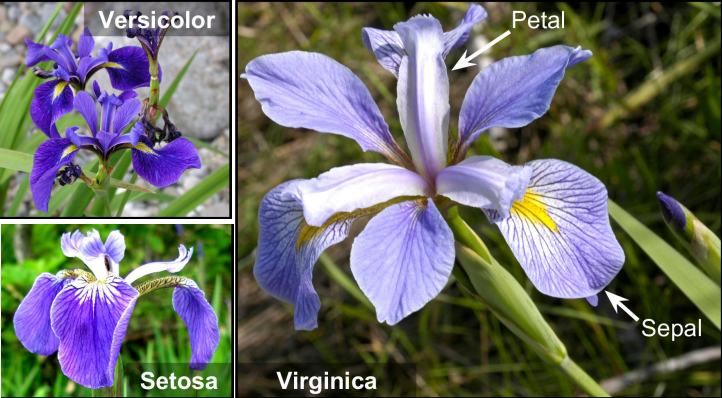

## **5. Loadings Plot**

El gráfico a continuación  representa las cargas factoriales (loadings) de las variables originales sobre los tres primeros componentes principales, útil para interpretar el significado de esos componentes. Las etiquetas indican qué variable representa cada punto en el espacio de componentes principales.

In [ ]:
loadings_label = df_loadings.index
# loadings_label = df_loadings.index.str.strip(' (cm)')

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()

**¿Cómo se interpreta?**

**Dirección e influencia de variables:**

Si una variable tiene una carga alta (positivo o negativo) en un componente, significa que influye fuertemente en ese componente.

Por ejemplo, si petal width tiene un valor alto en PC3, significa que PC3 está fuertemente influido por esa variable.


**Importancia de componentes:**

Si una variable está muy cerca del origen, tiene poca influencia en estos tres componentes.

Si está alejada del origen, es relevante para explicar la varianza del conjunto de datos en ese espacio de componentes.

**Ejemplo con lo que se ve:**

petal width (cm) está más alineada hacia PC3 → contribuye más a PC3.

sepal width (cm) tiene mayor proyección en PC1 → contribuye más a PC1.

sepal length (cm) parece proyectarse más en sentido negativo hacia PC3.

petal length (cm) está entre PC2 y PC3 → contribuye a ambos, pero no a PC1.

---